In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [2]:
data = pd.read_excel("code_card_data.xlsx")
data = data.drop_duplicates(subset=data.columns[:54].tolist())
data = data.to_numpy()
print(len(data))

10475


In [116]:
data1 = data[:,:]
X = data1[:8000, :55]
y = data1[:8000, 55].astype(int)
num_classes = len(np.unique(y))
y_ = to_categorical(y, num_classes=num_classes)
print(len(X))

8000


In [117]:
X_train_, X_test_, y_train, y_test = train_test_split(X, y_, test_size=0.1, random_state=1, stratify=y)
X_train = X_train_[:, :54]
X_test = X_test_[:, :54]
X_test_app = X_test_[:, 54]
print(len(X_train))

7200


In [52]:
# data1 = pd.read_excel("ab2.xlsx")
# data1 = data1.to_numpy()

In [53]:
# X_test = data1[:, :54]
# X_test_app = data1[:, 54]
# y_test = to_categorical(data1[:, 55], num_classes=num_classes)

In [118]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [119]:
model = Sequential([
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(num_classes, activation='softmax')  # Softmax for multi-class classification
])

In [120]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [121]:
# history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.1, verbose=1)
accuracy3 = []
for j in range(50):
    history = model.fit(X_train, y_train, epochs=1, batch_size=16, validation_split=0.1, verbose=1)
    y_pred_proba = model.predict(X_test)
    y_pred = np.argmax(y_pred_proba, axis=1)
    y_true = np.argmax(y_test, axis=1)
    k1 = 0
    k2 = 0
    for i in range(len(y_true)):
        if y_true[i]!=y_pred[i]:
            a = y_true[i] - X_test_app[i]
            b = y_pred[i] - X_test_app[i]
            if abs(a)>0.7 or abs(b)>0.7:
                k1+=1
        k2+=1
    accuracy3.append(1-k1/len(y_true))


# print(f"improved accuracy:{1-k1/len(y_true)}")
# print(f"traditional accuracy:{1-k2/len(y_true)}")


405/405 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5277 - loss: 1.0857 - val_accuracy: 0.6694 - val_loss: 0.7358
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
405/405 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6684 - loss: 0.7177 - val_accuracy: 0.6708 - val_loss: 0.7181
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
405/405 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6990 - loss: 0.6651 - val_accuracy: 0.7139 - val_loss: 0.6511
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
405/405 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7292 - loss: 0.5936 - val_accuracy: 0.7319 - val_loss: 0.6101
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
405/405 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7554 - loss: 0.5355 - val_accuracy: 0.7458 - val_loss: 0.5780
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
405/405 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7547 - loss: 0.5408 - val_accuracy: 0.7458 - val_loss: 0.5646
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
405/405 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.775

In [83]:
# y_pred_proba = model.predict(X_test)
# y_pred = np.argmax(y_pred_proba, axis=1)
# y_true = np.argmax(y_test, axis=1)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [78]:

# k1 = 0
# k2 = 0
# for i in range(len(y_true)):
#     if y_true[i]!=y_pred[i]:
#         a = y_true[i] - X_test_app[i]
#         b = y_pred[i] - X_test_app[i]
#         if abs(a)>0.7 or abs(b)>0.7:
#             k1+=1
#         k2+=1
# print(f"improved accuracy:{1-k1/len(y_true)}")
# print(f"traditional accuracy:{1-k2/len(y_true)}")

improved accuracy:0.9359999999999999
traditional accuracy:0.777


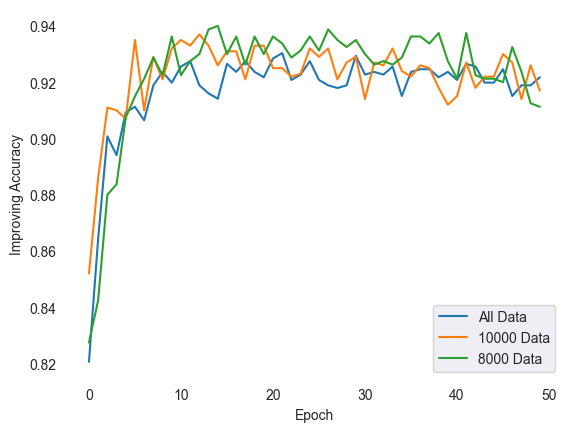

In [123]:
plt.plot(accuracy1)
plt.plot(accuracy2)
plt.plot(accuracy3)
# plt.plot(accuracy4)
# plt.plot(accuracy5)
# plt.plot(accuracy6)
# plt.title('Coding Data')
plt.ylabel('Improving Accuracy')
plt.xlabel('Epoch')
plt.legend(['All Data', '10000 Data', '8000 Data'], loc='lower right')
plt.box(False)
plt.savefig('0.2_128.png', dpi=300, bbox_inches='tight')
plt.show()